## **Simple pyNotebook with matplotlib**

The following notebook showcases the covid19 case study of India using free open API service - [Covid API](https://documenter.getpostman.com/view/10808728/SzS8rjbc#07de7625-d195-4bc3-95b8-a8fbacbd7b42)

**Loading the requests and json package**

In [31]:
import json
import requests

**CovidAPI Fetcher Class**

The following class uses the API source to retrieve data.

From the documentation, I have taken only India but can also retrieve data of other available countries.

The start_date is the date from which the further data are taken.



In [32]:
class CovidAPIFetcher:

    def __init__(self, location='India', start_date='2020-04-10'):
        self.location = location
        self.start_date = start_date
        self.base_url = 'https://api.covid19api.com/live/country/{}/status/confirmed/date/{}T00:00:00Z'.format(location,
                                                                                                               self.start_date)

    def get_data(self):
        return requests.get(self.base_url)

**Instantiating CovidAPI Fetcher Class and retrieving data**

The **get_data()** method of CovidAPIFetcher class fetches the data from the API and coverts to json format to retrieve the *Confirmed*, *Active* and *Deceased* death cases

In [33]:
covid = CovidAPIFetcher()
data = covid.get_data().json()

**Constructing data for plotting Graph**

In [34]:
confirmed = []
deaths = []
dates = []
recovered = []
for d in data:
    dates.append(d['Date'][:10])
    confirmed.append(d['Confirmed'])
    deaths.append(d['Deaths'])
    recovered.append(d['Recovered'])

**Loading matplotlib package**

In [35]:
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import matplotlib.patches as mpatches
import seaborn as sbs

sbs.set()

**Matplotlib plotting**

From the collected data the following graph is plotted

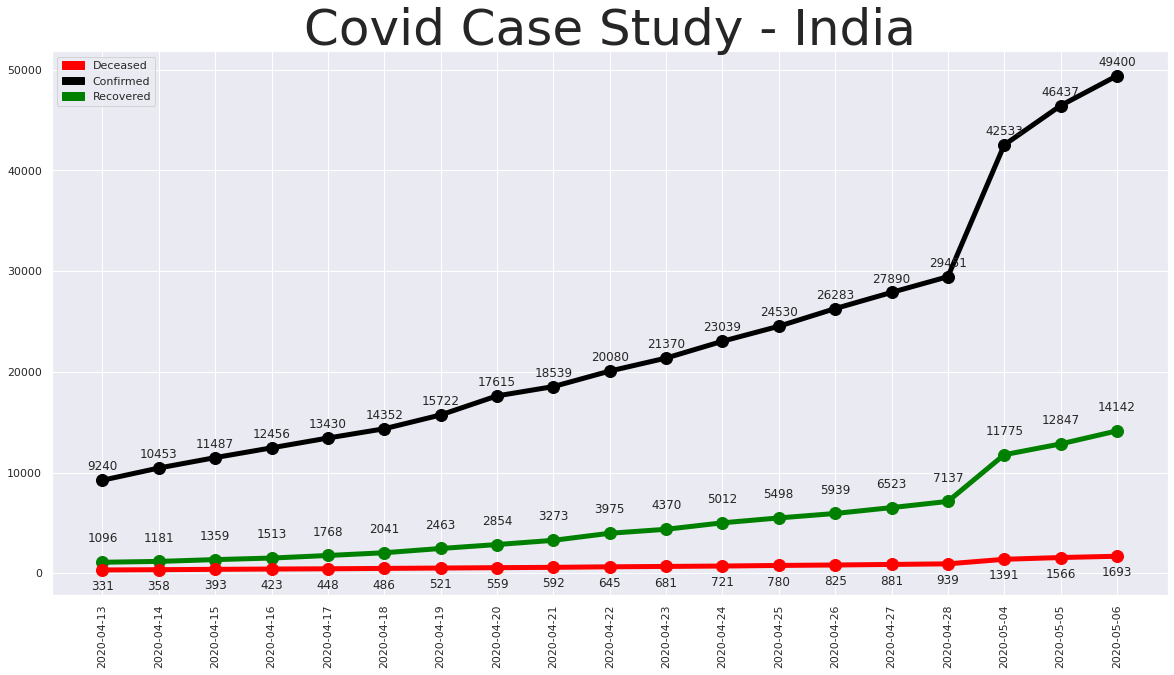

In [36]:
plt.figure(figsize=(20, 10))
plt.plot_date(dates, recovered, xdate=True, fmt='-o', lw=5, ms=12, color='green')
plt.plot_date(dates, deaths, xdate=True, fmt='-o', lw=5, ms=12, color='red')
plt.plot_date(dates, confirmed, xdate=True, fmt='-o', lw=5, ms=12, color='black')
for x, y in zip(dates, recovered):
    plt.annotate(y,  
                 (x, y),  
                 textcoords="offset points", 
                 xytext=(0, 20),
                 ha='center')
for x, y in zip(dates, deaths):
    plt.annotate(y, 
                 (x, y),  
                 textcoords="offset points",
                 xytext=(0, -20), 
                 ha='center')
for x, y in zip(dates, confirmed):
    plt.annotate(y, 
                 (x, y),
                 textcoords="offset points",
                 xytext=(0, 10),  
                 ha='center')
red_patch = mpatches.Patch(color='red', label='Deceased')
black_patch = mpatches.Patch(color='black', label='Confirmed')
green_patch = mpatches.Patch(color='green', label='Recovered')
plt.legend(handles=[red_patch, black_patch, green_patch])
plt.title('Covid Case Study - India', fontsize=50)
plt.xticks(dates, dates, rotation='vertical');